# LENDING CLUD CASE STUDY

This  __BANKING and FINANCIAL SERVICES__  case study __aims to benefit__ consumer finance __company to identify risky loan applicants__. Additionally, it also __helps to recognize the patterns which indicate if a loan applicant is likely to default__, which could be used by the company to make decision on loan approval.

#### Dataset 
loan.csv

#### Data Dictionary
Data_Dictionary.xlsx

## IMPORT ALL REQUIRED LIBRARIES
This step involves with importing all the required libraries for Lending Club Case Study.

In [256]:
#   Import all the required Python libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## SOURCING
This step involves fetching the input data/dataset for the case.

In [257]:
#   Fetch the data from loan.csv file.
loanData = pd.read_csv('loan.csv')
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [258]:
#   Print the file's head() data here.
print(loanData.head())
#   Print the file's tail() data here.
print(loanData.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [259]:
# Lets get further information about the dataset from loan.csv.
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


###   SOURCING Analysis    
1. Shape of the dataset --> 39717 rows and 111 columns<br><br>
2. Data types scattered in the loan.csv file --> float64(74), int64(13), object(24)<br>
-There are __74__ columns with ___Float___ as data type<br>
-There are __13__ columns with ___Integers___ as as datatype<br>
-There are __24__ columns with ___Object___ as as datatype<br>

##   CLEANING
This step involves cleaning the input data/dataset for the case, which could create issue for our analysis.

In [260]:
#   Lets remove the columns with null values 
loanData = loanData.dropna(axis=1, how='all')
print(loanData.head())
print(loanData.tail())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code applicat

In [261]:
#   Check the shape of the information of newly saved dataframe
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [262]:
#   Remove all the duplicate items if there are any based on 'id' column 

#   Get the list of ids where only 1 id is taken if multiple found. 
loanData.duplicated(subset=None, keep='first').count()
#   Print the duplicate columns 
loanData[loanData.duplicated(['id'])]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [263]:
#   Lets Fetch further columns with only single values in all the rows. If found, removing them as these wont be able to help in our analysis

#   fetch all column names
col_list = np.array(loanData.columns.tolist())
col_list

#   Print the shape of dataframe before droping the columns with 1 value
print("Before running the logic to check for columns with only single value, dataframe shape is - "+str(loanData.shape))
#   code to loop all the columns, if the count of unique values in a column is 1, remove the column
for i in col_list:
    if len(loanData[str(i)].unique()) == 1:
        loanData = loanData.drop([str(i)], axis=1)

#   Print the shape of dataframe before droping the columns with 1 value
print("After running the logic to check for columns with only single value, dataframe shape is - "+str(loanData.shape))

print(loanData.head())
print(loanData.tail())

Before running the logic to check for columns with only single value, dataframe shape is - (39717, 57)
After running the logic to check for columns with only single value, dataframe shape is - (39717, 51)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... recoveries  \
0   10.65%       162.87     B        B2  ...       0.00   
1   15.27%        59.83     C        C4  ...     117.08   
2   15.96%        84.33     C        C5  ...       0.00   
3   13.49%       339.31     C        C1  ...       0.00   
4   12.69%        67.79     B  

In [264]:
#   Lets Fetch further null details about all the columns of the dataset loan.csv. Furthermore, drop columns where null value percentage in a column is more than 20% 
loanData.isnull().sum()

#   Print the shape of dataframe before droping the columns with null value percentage > 20%
print("Before running the logic to check for columns with null value, dataframe shape is - "+str(loanData.shape))

#   Store column names with null value in variable
NullValCols = np.array(loanData.columns[loanData.isnull().any()].tolist())
#print("Total Column count with null values - "+str(len(NullValCols)) )

for i in NullValCols:
    #print("Column Name - "+str(i)+", Count of null values in this column - "+str(loanData[str(i)].isnull().sum()))
    #print("Column Name - "+str(i)+", Percentage of null values in this column - "+str(round((loanData[str(i)].isnull().sum()/len(loanData))*100,2)))
    #remove the columns with null value percentage > 20
    if round((loanData[str(i)].isnull().sum()/len(loanData))*100,2)>20:
        loanData = loanData.drop([str(i)], axis=1)

#   Print the shape of dataframe after droping the columns with null value percentage > 20%
print("After running the logic to check for columns with null value, dataframe shape is - "+str(loanData.shape))

print(loanData.head())
print(loanData.tail())

Before running the logic to check for columns with null value, dataframe shape is - (39717, 51)
After running the logic to check for columns with null value, dataframe shape is - (39717, 47)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_late_fee recoveries  \
0   10.65%       162.87     B        B2  ...               0.00       0.00   
1   15.27%        59.83     C        C4  ...               0.00     117.08   
2   15.96%        84.33     C        C5  ...               0.00       0.00   
3   13.49%       339.31     

In [265]:
#fetching the data for these columns 
col_list = np.array(loanData.columns.tolist())
print(col_list)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'url' 'purpose' 'title' 'zip_code' 'addr_state' 'dti'
 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee'
 'last_pymnt_d' 'last_pymnt_amnt' 'last_credit_pull_d'
 'collections_12_mths_ex_med' 'chargeoff_within_12_mths'
 'pub_rec_bankruptcies' 'tax_liens']


In [266]:
#   Check if all id's and  and membership id's are unique value, if so, we can remove them as they won't help analysis

#   Print the shape of dataframe before checking the id/membership_id column
print("Before running the logic to check id/membership_id columns with all unique value, dataframe shape is - "+str(loanData.shape))

if len(loanData)==len(loanData['id'].unique()):
    loanData = loanData.drop(['id'], axis=1)

if len(loanData)==len(loanData['member_id'].unique()):
    loanData = loanData.drop(['member_id'], axis=1)

#   Print the shape of dataframe after checking the id/membership_id column
print("After running the logic to check id/membership_id columns with all unique value, dataframe shape is - "+str(loanData.shape))

print(loanData.head())
print(loanData.tail())

Before running the logic to check id/membership_id columns with all unique value, dataframe shape is - (39717, 47)
After running the logic to check id/membership_id columns with all unique value, dataframe shape is - (39717, 45)
   loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length  ...  \
0     B        B2                       NaN  10+ years  ...   
1     C        C4                     Ryder   < 1 year  ...   
2     C        C5                       NaN  10+ years  ...   
3     C        C1       AIR RESOURCES 

In [267]:
#   Dropping list of columns which are not required/ helpful for our analysis

#   Print the shape of dataframe before removing the columns which are not required
print("Before removing the columns which are not required, dataframe shape is - "+str(loanData.shape))

loanData = loanData.drop(['funded_amnt_inv', 'url', 'emp_title', 'title', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med', 'out_prncp_inv', 'total_pymnt_inv', 'earliest_cr_line', 'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'revol_util','revol_bal', 'total_pymnt', 'recoveries'],axis=1)

#   Print the shape of dataframe after removing the columns which are not required
print("After removing the columns which are not required, dataframe shape is - "+str(loanData.shape))

print(loanData.head())
print(loanData.tail())

Before removing the columns which are not required, dataframe shape is - (39717, 45)
After removing the columns which are not required, dataframe shape is - (39717, 23)
   loan_amnt  funded_amnt        term int_rate  installment grade sub_grade  \
0       5000         5000   36 months   10.65%       162.87     B        B2   
1       2500         2500   60 months   15.27%        59.83     C        C4   
2       2400         2400   36 months   15.96%        84.33     C        C5   
3      10000        10000   36 months   13.49%       339.31     C        C1   
4       3000         3000   60 months   12.69%        67.79     B        B5   

  emp_length home_ownership  annual_inc  ...         purpose zip_code  \
0  10+ years           RENT     24000.0  ...     credit_card    860xx   
1   < 1 year           RENT     30000.0  ...             car    309xx   
2  10+ years           RENT     12252.0  ...  small_business    606xx   
3  10+ years           RENT     49200.0  ...           other    

In [268]:
# Further remove the Null values
loanData.info()

loanData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  zip_code              39717 non-null  object 
 15  addr_state         

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [269]:
#   There seems to be 2 columns with null values, lets get these columns 
NullValCols = np.array(loanData.columns[loanData.isnull().any()].tolist())
for i in NullValCols:
					print(str(i))
					print(loanData[str(i)].isnull().sum())


emp_length
1075
pub_rec_bankruptcies
697


In [270]:
#   Lets Check the emp_length data
print("Mode for the column : " + loanData.emp_length.mode()[0])
loanData.emp_length.value_counts()

#   As we can see the max data is in 10+ Years.Additionally, we can see the count of mode is around twice the next best count.  This define that we can use the mode value instead of null values safely.
loanData.emp_length.fillna(loanData.emp_length.mode()[0], inplace = True)
loanData.emp_length.isna().sum()

Mode for the column : 10+ years


0

In [271]:
#   As number of count of null values in pub_rec_bankruptcies, Lets check it further and solve the null value issue
print("Mode for this column : "+str(loanData.pub_rec_bankruptcies.mode()))
loanData.pub_rec_bankruptcies.value_counts()

#   As we can see the maximum data in column is 0.0, which has a count 22times more than next best item, so increasing the 0.0 could cause further negation to percentage in coulmn if we push the null values to 0.0[Mode].
#   So we will remove these 697 null values
loanData.dropna(axis = 0, subset = ['pub_rec_bankruptcies'] , inplace = True)
loanData.pub_rec_bankruptcies.isna().sum()

Mode for this column : 0    0.0
Name: pub_rec_bankruptcies, dtype: float64


0

In [272]:
#   Lets verify if all the null values are handled
loanData.isnull().sum()

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [273]:
#   Lets check the new shpe of our dataset
print(loanData.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39020 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39020 non-null  int64  
 1   funded_amnt           39020 non-null  int64  
 2   term                  39020 non-null  object 
 3   int_rate              39020 non-null  object 
 4   installment           39020 non-null  float64
 5   grade                 39020 non-null  object 
 6   sub_grade             39020 non-null  object 
 7   emp_length            39020 non-null  object 
 8   home_ownership        39020 non-null  object 
 9   annual_inc            39020 non-null  float64
 10  verification_status   39020 non-null  object 
 11  issue_d               39020 non-null  object 
 12  loan_status           39020 non-null  object 
 13  purpose               39020 non-null  object 
 14  zip_code              39020 non-null  object 
 15  addr_state            39

In [274]:
#   Standardizing data - replacing invalid values from DF

#   'int_rate' to remove %
loanData['int_rate'] = loanData['int_rate'].str.replace("%","").replace(" ","")
#loanData['int_rate']

#   'emp_length' to remove +, <, year and years, if present --done
loanData['emp_length'] = loanData['emp_length'].str.replace("+","").replace("< 1 year","0")
loanData['emp_length']=loanData['emp_length'].str.replace("years","").replace(" ","")
loanData['emp_length']=loanData['emp_length'].str.replace("year","").replace(" ","")
#loanData['emp_length']

# 'term' to remove months 
loanData['term'] = loanData['term'].str.replace("months","").replace(" ","")
#loanData['term']

# 'zip_code' to remove x from the data
loanData['zip_code'] = loanData['zip_code'].str.replace("x","")
#loanData['zip_code']

print(loanData.head(2))
print(loanData.tail(2))
loanData.shape

   loan_amnt  funded_amnt  term int_rate  installment grade sub_grade  \
0       5000         5000   36     10.65       162.87     B        B2   
1       2500         2500   60     15.27        59.83     C        C4   

  emp_length home_ownership  annual_inc  ...      purpose zip_code addr_state  \
0        10            RENT     24000.0  ...  credit_card      860         AZ   
1          0           RENT     30000.0  ...          car      309         GA   

     dti delinq_2yrs inq_last_6mths  open_acc  pub_rec  total_acc  \
0  27.65           0              1         3        0          9   
1   1.00           0              5         3        0          4   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  

[2 rows x 23 columns]
       loan_amnt  funded_amnt  term int_rate  installment grade sub_grade  \
39666      15450        15450   36     11.22       507.46     C        C4   
39680       3000         3000   36     11.86        99.44     D        D1

(39020, 23)

In [275]:
#   Standardizing data - Changing column type in the DF
List_num=['loan_amnt','funded_amnt','term', 'emp_length', 'annual_inc', 'zip_code', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'total_acc', 'pub_rec_bankruptcies', 'int_rate', 'installment', 'dti']
List_obj=['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state','issue_d'] 

#   Changing the column type to numeric
loanData[List_num] = loanData[List_num].apply(pd.to_numeric)

#   As these all are already in object type, no need to change them
for i in List_obj:
    loanData[i].dtype

In [276]:
#   Checking information about the dataframe
print(loanData.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39020 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39020 non-null  int64  
 1   funded_amnt           39020 non-null  int64  
 2   term                  39020 non-null  int64  
 3   int_rate              39020 non-null  float64
 4   installment           39020 non-null  float64
 5   grade                 39020 non-null  object 
 6   sub_grade             39020 non-null  object 
 7   emp_length            39020 non-null  int64  
 8   home_ownership        39020 non-null  object 
 9   annual_inc            39020 non-null  float64
 10  verification_status   39020 non-null  object 
 11  issue_d               39020 non-null  object 
 12  loan_status           39020 non-null  object 
 13  purpose               39020 non-null  object 
 14  zip_code              39020 non-null  int64  
 15  addr_state            39

### Outliers Treatment

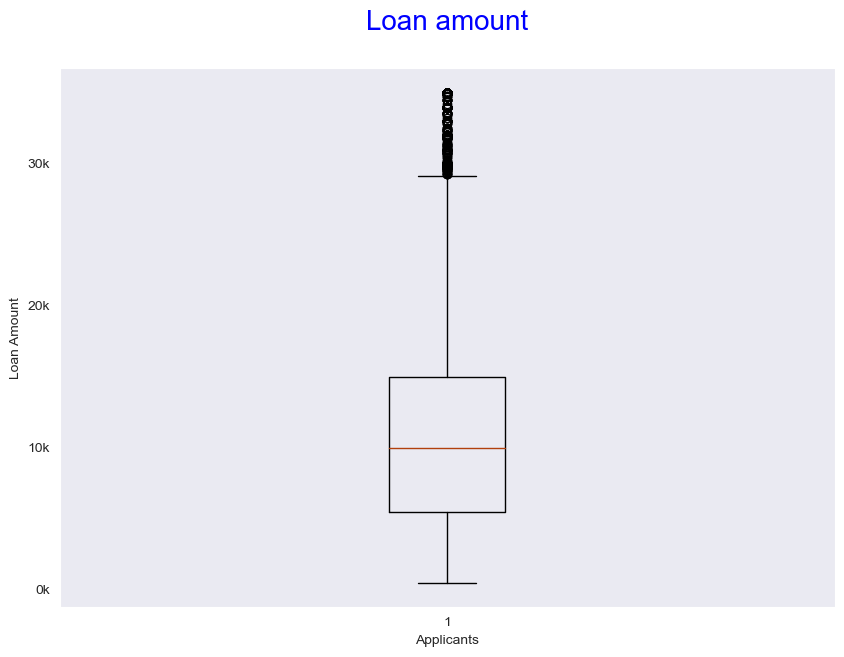

In [277]:
#   Lets check the outliers for 'loan_amnt'
#loanData['loan_amnt'].max()-35000
plt.figure(figsize=(10, 7))
plt.boxplot(loanData['loan_amnt'])

plt.title("Loan amount\n", fontdict={'fontsize':20,'fontweight':5,'color':'b'})
plt.xlabel("Applicants")
plt.ylabel("Loan Amount")

ticks=np.arange(0,40000,10000)
labels=["{}k".format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()


In [278]:
#   As we can see that there is presence of outliers, lets get further info
print(str(loanData['loan_amnt'].describe()))

#As we can see the outliers seems a little away from the 75th percentile, still it data with top 25% sems to be connected, so keeping the data as is.

count    39020.000000
mean     11242.004741
std       7472.992773
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


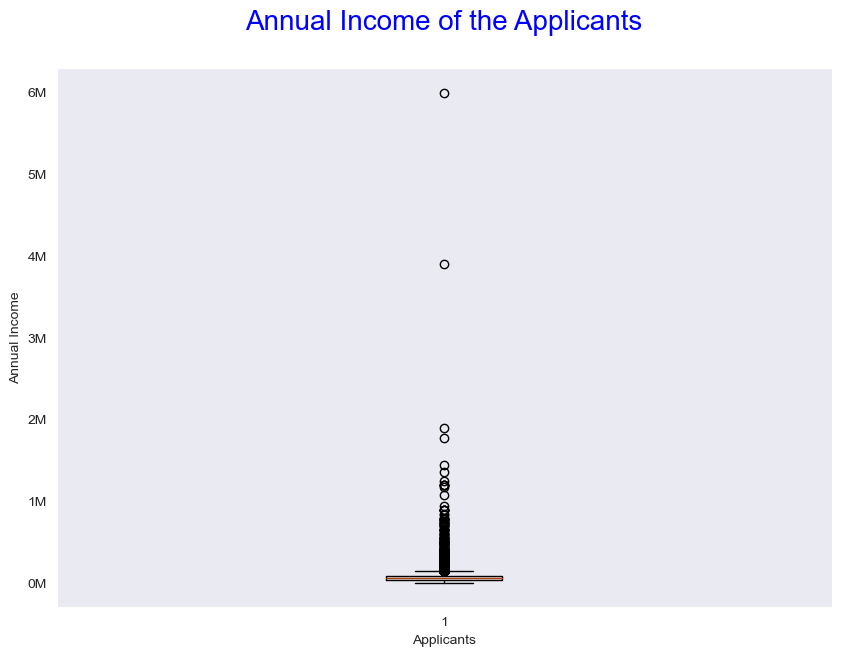

In [279]:
#   Lets check the outlier for 'annual_inc'
plt.figure(figsize=(10, 7))
plt.boxplot(loanData['annual_inc'])

plt.title("Annual Income of the Applicants\n", fontdict={'fontsize':20,'fontweight':5,'color':'b'})
plt.xlabel("Applicants")
plt.ylabel("Annual Income")

ticks=np.arange(0,7000000,1000000)
labels=["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

In [280]:
#   As we can see that there is presence of outliers, lets get further info
print(str(loanData['annual_inc'].describe()))

#   lets create quantiles to get better picture to remove these outliers
an_inc_quantile = loanData.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
an_inc_quantile


count    3.902000e+04
mean     6.895865e+04
std      6.315594e+04
min      4.000000e+03
25%      4.080000e+04
50%      5.900000e+04
75%      8.240400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


0.50     59000.00
0.75     82404.00
0.90    116000.00
0.95    141619.80
0.97    165000.00
0.98    186286.44
0.99    234486.00
Name: annual_inc, dtype: float64

In [281]:
#   As we can see that the salary more than 95 percentile seems to be little disconnected, so we will limit annual inc to 95 percentile
print("Before removing outliers, size was "+str(loanData['annual_inc'].size))
percentile_annual_inc_95 = loanData['annual_inc'].quantile(0.95)
loanData = loanData[loanData['annual_inc'] <= percentile_annual_inc_95 ]
loanData['annual_inc'].size
print("After removing outliers, size was "+str(loanData['annual_inc'].size))


Before removing outliers, size was 39020
After removing outliers, size was 37069


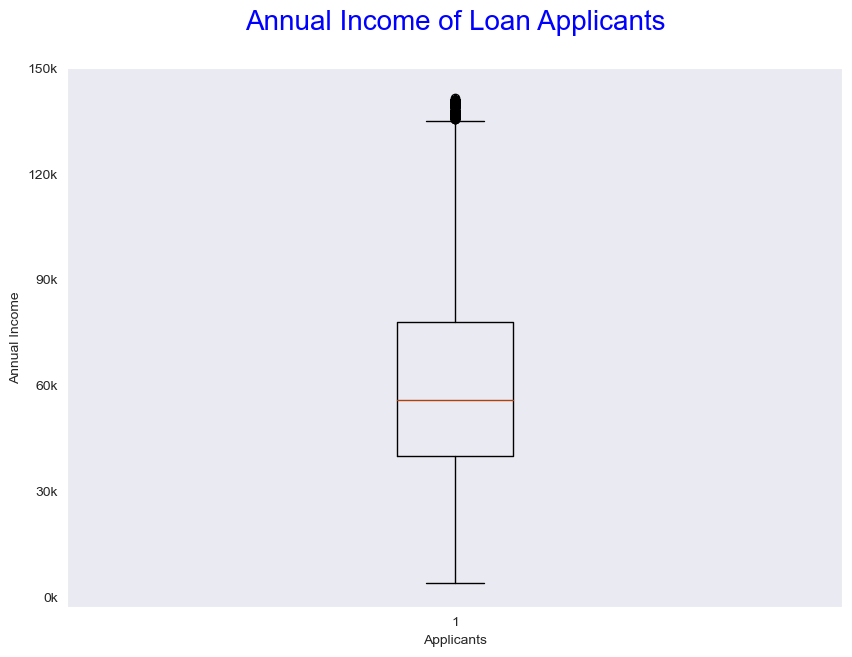

In [282]:
#   Lets check the 'annual_inc' now
plt.figure(figsize=(10, 7))
plt.boxplot(loanData['annual_inc'])

plt.title("Annual Income of Loan Applicants\n", fontdict={'fontsize':20,'fontweight':5,'color':'b'})
plt.xlabel("Applicants")
plt.ylabel("Annual Income")

ticks=np.arange(0,180000,30000)
labels=["{}k".format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#    The data seems much more connected now.

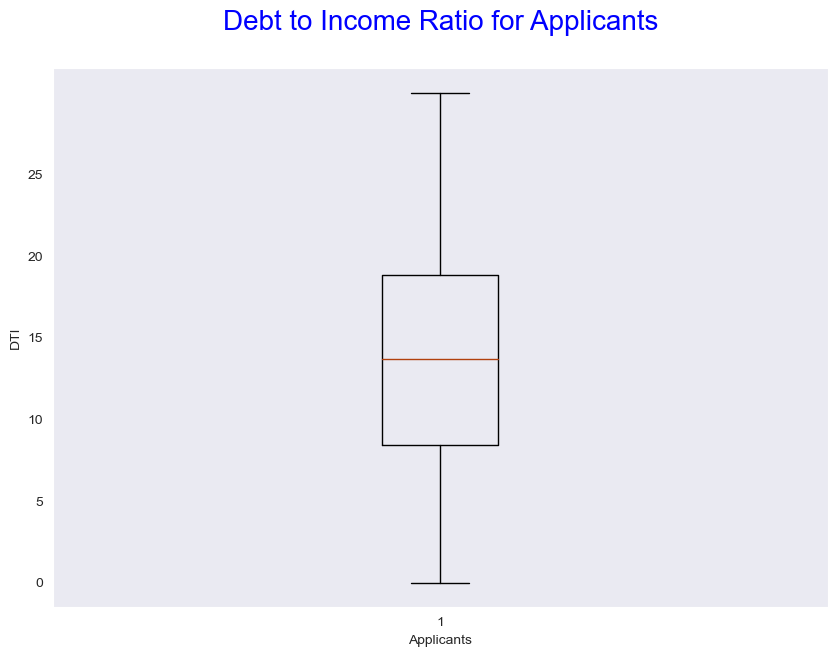

In [283]:
#   Lets check the outliers for 'dti'

plt.figure(figsize=(10, 7))
plt.boxplot(loanData['dti'])

plt.title("Debt to Income Ratio for Applicants\n", fontdict={'fontsize':20,'fontweight':5,'color':'b'})
plt.xlabel("Applicants")
plt.ylabel("DTI")

ticks=np.arange(0,30,5)
labels=["{}".format(i) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

In [284]:
#   Create 'issue_months' and 'issue_year' columns from 'issue_d' and dropping the 'issue_d'
loanData['issue_month']=loanData['issue_d'].astype('string')
loanData['issue_year']=loanData['issue_d'].astype('string')

loanData['issue_month'] = loanData['issue_month'].apply(lambda x : x.split('-')[0])
loanData['issue_year']= loanData['issue_year'].apply(lambda x : x.split('-')[1])

loanData = loanData.drop(['issue_d'], axis=1)

loanData.head()
loanData.tail()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_month,issue_year
39562,4800,4800,36,10.28,155.52,C,C1,1,RENT,35000.0,...,VA,7.51,0,0,11,1,12,1.0,Nov,07
39573,7000,7000,36,10.59,227.82,C,C2,3,MORTGAGE,63500.0,...,AZ,8.50,0,1,9,1,21,1.0,Nov,07
39623,9000,9000,36,12.49,301.04,D,D3,8,MORTGAGE,39000.0,...,MD,5.08,0,3,9,1,37,1.0,Oct,07
39666,15450,15450,36,11.22,507.46,C,C4,2,MORTGAGE,40000.0,...,VA,13.50,0,3,13,1,29,1.0,Aug,07
39680,3000,3000,36,11.86,99.44,D,D1,2,MORTGAGE,36153.0,...,IN,7.47,0,2,3,1,6,1.0,Aug,07


### ANALYSIS ON THE CLEAN DATA

dtypes: float64(20), int64(13), object(24)<br>
No duplicate rows found on basis of id column<br>
There were 6 columns which were dropped as those had only 1 value for all rows, which was not helpful for the analysis<br>
We can see for these 4 columns, named as  'mths_since_last_record', 'mths_since_last_delinq', 'desc' and 'next_pymnt_d', has the null value percentage greater than 20%. Therefore, we have to drop these above columns.<br> 
Dropped 'id' and 'membership_id' as they have unique values across the table and couldn't help us further with the analysis<br>
After deleting the non required columns, we are left with 22 columns left

## Univariate Analysis


Text(0.5, 1.0, 'Loan Status')

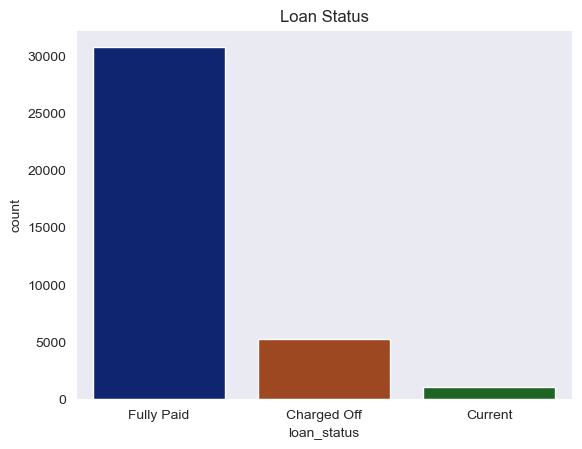

In [285]:
#   Lets do the Analysis on 'loan_status' categiories
sns.countplot(x = 'loan_status',data = loanData).set_title("Loan Status")

This represents Highest applicants have loan status of Fully Paid, followed by Charged off and lastly current.

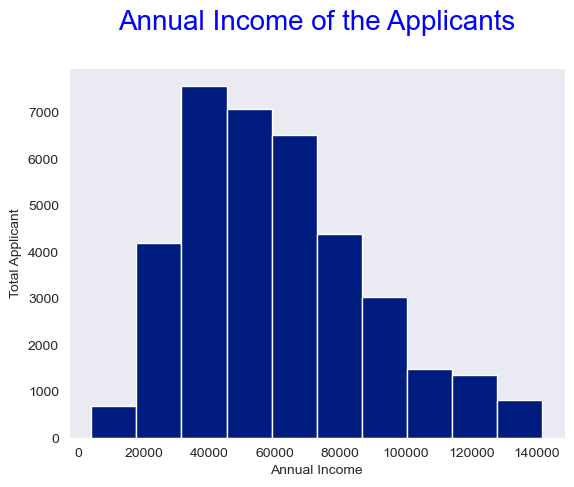

[ 0.  5. 10. 15. 20. 25. 30.]
count     37069.000000
mean      61101.800200
std       27774.338676
min        4000.000000
25%       40000.000000
50%       56004.000000
75%       78000.000000
max      141600.000000
Name: annual_inc, dtype: float64


In [286]:
#   Lets do the Analysis on 'annual_inc' categiories
# print(loanData.annual_inc.max())  #4000
# print(loanData.annual_inc.min())  #141600

plt.hist(loanData['annual_inc'], bins = 10, edgecolor='white')

plt.title("Annual Income of the Applicants\n", fontdict={'fontsize':20,'fontweight':5,'color':'b'})
plt.xlabel("Annual Income")
plt.ylabel("Total Applicant")

plt.show()
print(bins)
print(loanData['annual_inc'].describe())

This represents the maximum number of Applicant for loan are having a annual income of 30000 - 40000. Additionally, it also tells around 4500 people have salary less than 30000.

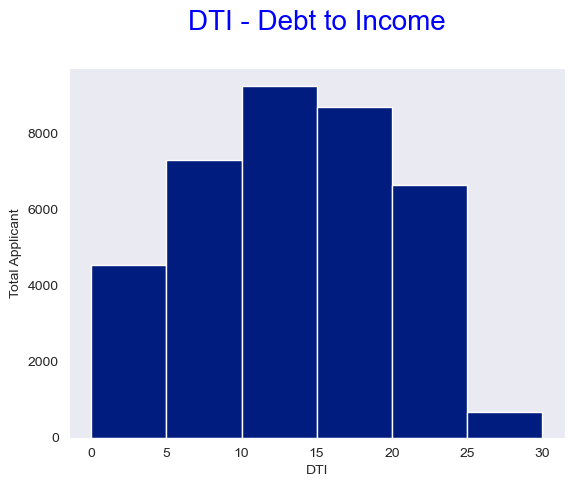

In [287]:
#   Lets do the Analysis on 'dti' categiories

ou1,bins,out3=plt.hist(loanData['dti'], bins = 6, range=[0,30],edgecolor='white')

plt.title("DTI - Debt to Income\n", fontdict={'fontsize':20,'fontweight':5,'color':'b'})
plt.xlabel("DTI")
plt.ylabel("Total Applicant")

plt.show()

This represents that the composition of DTI of the data.Composition of highest applicants with top 3 DTI falls under the categories as 10-15, 15-20 and 5-10 respectively. 

Text(0.5, 1.0, 'Public Recorded Bankruptcies')

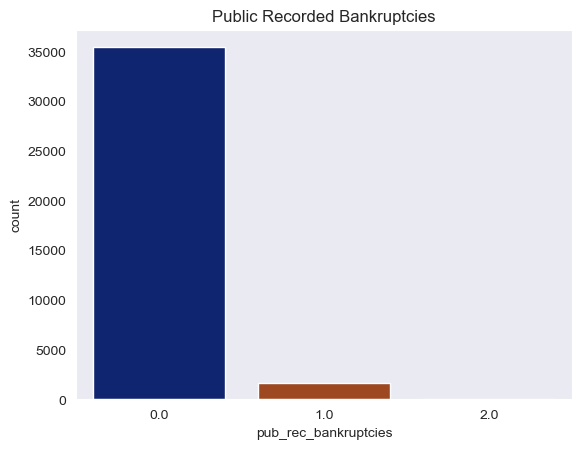

In [288]:
#   Lets do the Analysis on 'pub_rec_bankruptcies' categiories
sns.countplot(x = 'pub_rec_bankruptcies', data = loanData).set_title('Public Recorded Bankruptcies')

Seems like there are 1634 applicants with public recorded bankruptcies.

Text(0.5, 1.0, 'Home Ownership of the Applicants')

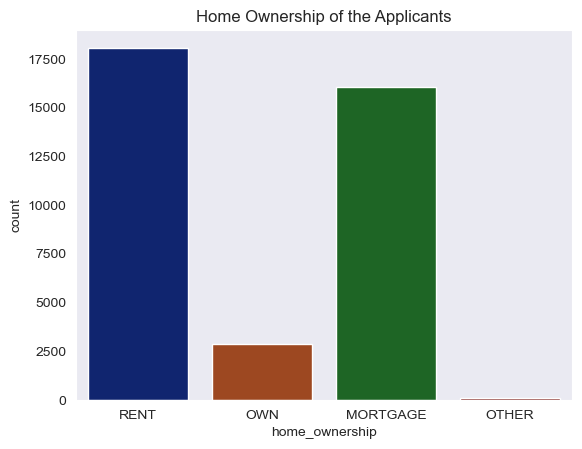

In [289]:
#   Lets do the Analysis on 'home_ownership' categiories
sns.countplot(x = 'home_ownership', data = loanData).set_title('Home Ownership of the Applicants')

It presents most of the applicants are either living on rent or property is mortgage.

Text(0.5, 1.0, 'Verification Status of Applicants')

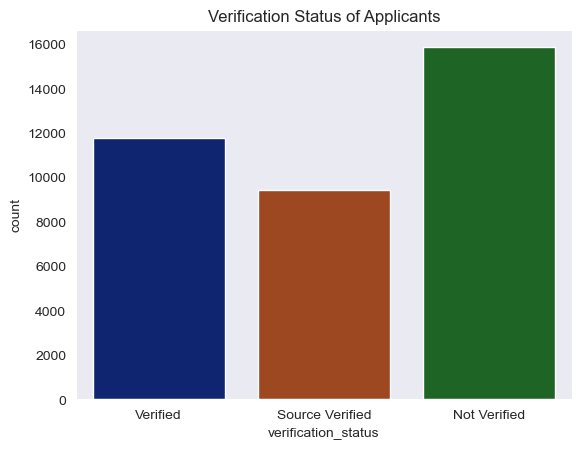

In [290]:
#   Lets do the Analysis on 'verification_status' categiories
sns.countplot(x = 'verification_status', data = loanData).set_title('Verification Status of Applicants')

This represents high number of applicants which have not being verified. This is followed by the count of source verified and verified are nearly same. 

Text(0.5, 1.0, 'Loan enquiry in last 6 months')

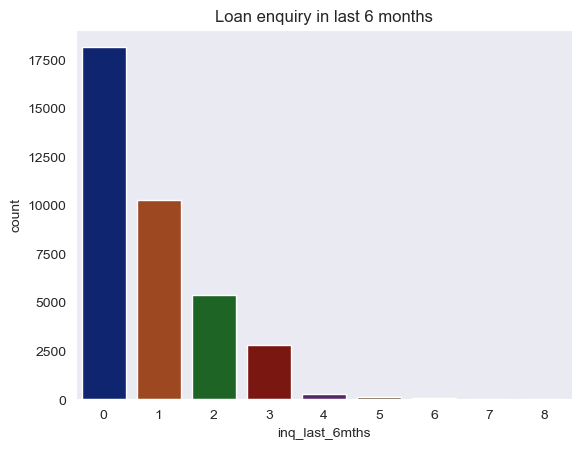

In [291]:
#   Lets do the Analysis on 'delinq_2yrs' categiories
sns.countplot(x = 'inq_last_6mths', data = loanData).set_title('Loan enquiry in last 6 months')

This represents inquiry in last 6 months data. Seems like the most of the applicants have 0 to 3 enquiries. However, there are some applicants with enquiry between 4 to 8

Text(0.5, 1.0, 'Loan term of Applicants(In Months)')

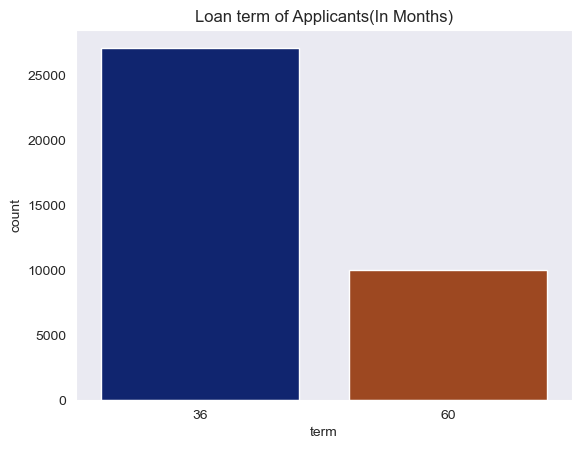

In [292]:
#   Lets do the Analysis on 'term' categiories
sns.countplot(x = 'term', data = loanData).set_title('Loan term of Applicants(In Months)')

This represents maximum applicants have a Loan term of 36 months.

Text(0.5, 1.0, 'Issue of Loan(monthly)')

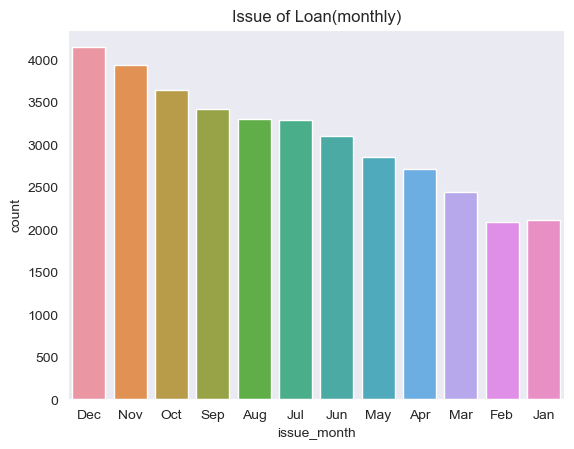

In [293]:
#   Lets do the Analysis on 'issue_month' categiories
sns.countplot(x = 'issue_month', data = loanData).set_title('Issue of Loan(monthly)')

This represents the maximum loan being issued in December.

## Bivariate Analysis

In [294]:
#   Deriving required categories for the analysis


loanData['loanData_amnt_cats'] = pd.cut(loanData['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0k-7k', '7k-14k', '14k-21k', '21k-28k', '28k +'])

loanData['annual_inc_cats'] = pd.cut(loanData['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0k-2k', '20K-40k', '40k-60k', '60k-80k', '80k +'])

loanData['int_rate_cats'] = pd.cut(loanData['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '13-16', '16 +'])

loanData['dti_cats'] = pd.cut(loanData['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '20+'])

print(loanData.head())
print(loanData.tail())


   loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
0       5000         5000    36     10.65       162.87     B        B2   
1       2500         2500    60     15.27        59.83     C        C4   
2       2400         2400    36     15.96        84.33     C        C5   
3      10000        10000    36     13.49       339.31     C        C1   
4       3000         3000    60     12.69        67.79     B        B5   

   emp_length home_ownership  annual_inc  ... open_acc pub_rec total_acc  \
0          10           RENT     24000.0  ...        3       0         9   
1           0           RENT     30000.0  ...        3       0         4   
2          10           RENT     12252.0  ...        2       0        10   
3          10           RENT     49200.0  ...       10       0        37   
4           1           RENT     80000.0  ...       15       0        38   

   pub_rec_bankruptcies issue_month  issue_year  loanData_amnt_cats  \
0                   0.0    

In [295]:
#   Annual Income vs Charged off - with the help of income category created above 'annaul_inc_cats'

inc_vs_COloan = loanData.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_vs_COloan['Total'] = inc_vs_COloan['Charged Off'] + inc_vs_COloan['Current'] + inc_vs_COloan['Fully Paid'] 
inc_vs_COloan['Chargedoff_Proportion'] = inc_vs_COloan['Charged Off'] / inc_vs_COloan['Total']
inc_vs_COloan.sort_values('Chargedoff_Proportion', ascending=False)
inc_vs_COloan

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0k-2k,232,9,908,1149,0.201915
1,20K-40k,1484,170,6849,8503,0.174527
2,40k-60k,1705,345,9384,11434,0.149117
3,60k-80k,995,240,6496,7731,0.128703
4,80k +,891,290,7071,8252,0.107974


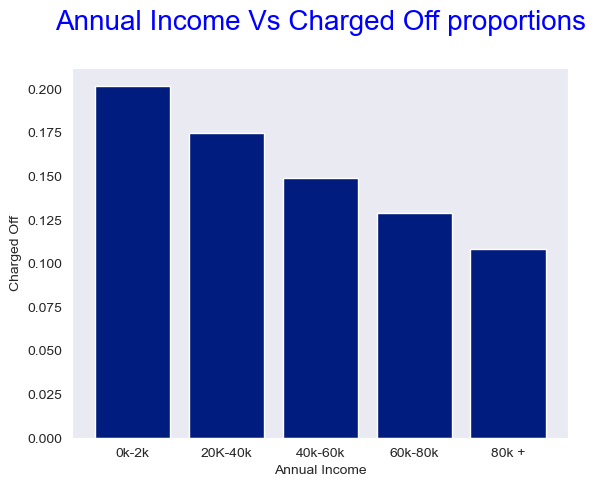

In [296]:
#   Plot the above analysis on bar
plt.bar(inc_vs_COloan['annual_inc_cats'], inc_vs_COloan['Chargedoff_Proportion'])
plt.title("Annual Income Vs Charged Off proportions\n", fontdict={'fontsize':20,'fontweight':5,'color':'b'})
plt.xlabel("Annual Income")
plt.ylabel("Charged Off")

plt.show()

Here there are 3 pointers -<br><br>
-Income range 0-20000 has high chances of charged off.<br>
-Income 80000+  has less chances of charged off.<br>
-Notice that with increase in annual income, the charged off portion is decreasing.<br> 

In [297]:
#   Purpose of Loan Vs Chargedoff_Proportion

purp_vs_COloan = loanData.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purp_vs_COloan['Total'] = purp_vs_COloan['Charged Off'] + purp_vs_COloan['Current'] + purp_vs_COloan['Fully Paid'] 
purp_vs_COloan['Chargedoff_Proportion'] = purp_vs_COloan['Charged Off'] / purp_vs_COloan['Total']
purp_vs_COloan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,438.0,72.0,1138.0,1648.0,0.265777
10,renewable_energy,18.0,1.0,77.0,96.0,0.187500
3,educational,51.0,0.0,243.0,294.0,0.173469
7,medical,103.0,9.0,532.0,644.0,0.159938
9,other,591.0,116.0,3008.0,3715.0,0.159085
8,moving,87.0,7.0,454.0,548.0,0.158759
5,house,54.0,12.0,280.0,346.0,0.156069
2,debt_consolidation,2627.0,548.0,14399.0,17574.0,0.149482
12,vacation,52.0,6.0,307.0,365.0,0.142466
4,home_improvement,314.0,82.0,2209.0,2605.0,0.120537


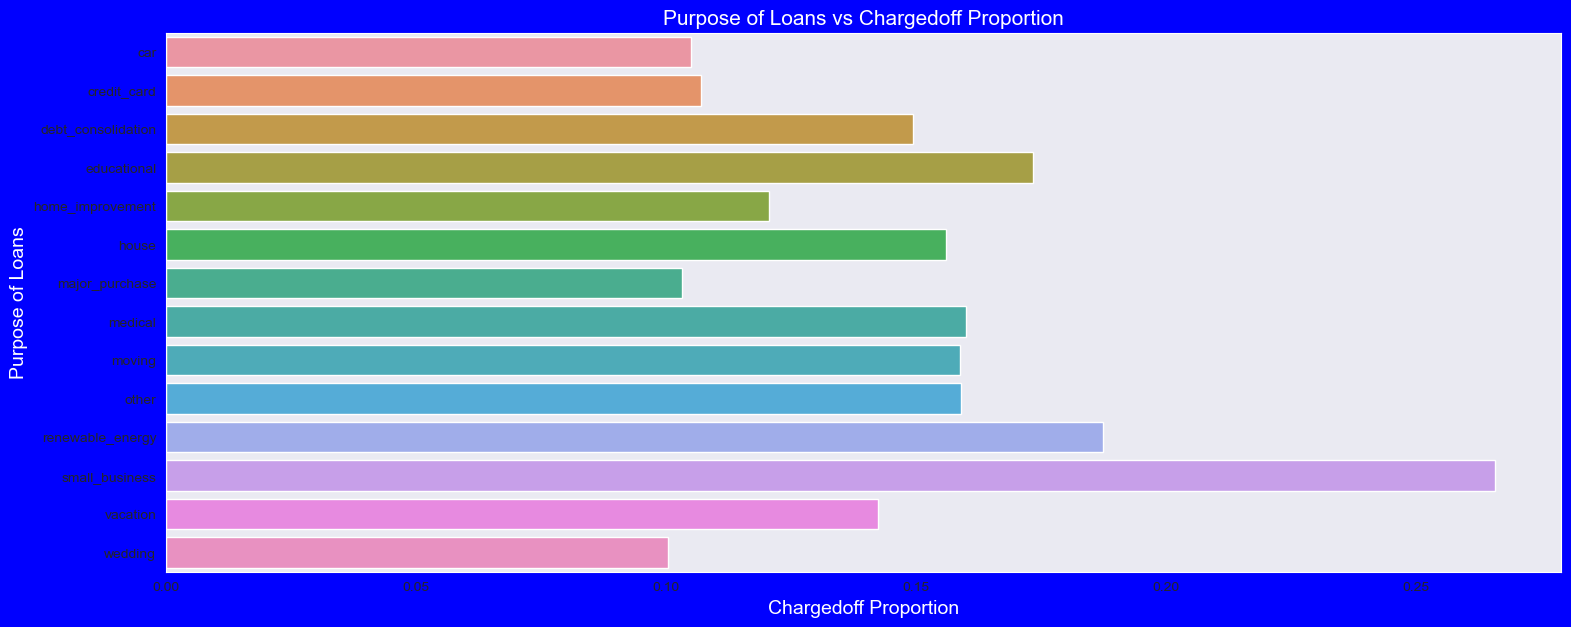

In [298]:
#   Plot the above analysis on bar
fig, ax1 = plt.subplots(figsize=(18, 7),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purp_vs_COloan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Here is the analysis :<br><br>
-small Business applicants have high chnaces of getting charged off.<br>
-major_purchase where chanrged off proportion is better as compare to other categories.<br>

In [299]:
#   Grade Vs Charged Off Proportion

gr_vs_COloan = loanData.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
gr_vs_COloan['Total'] = gr_vs_COloan['Charged Off'] + gr_vs_COloan['Current'] + gr_vs_COloan['Fully Paid'] 
gr_vs_COloan['Chargedoff_Proportion'] = gr_vs_COloan['Charged Off'] / gr_vs_COloan['Total']
gr_vs_COloan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,95,14,165,274,0.346715
5,F,285,57,588,930,0.306452
4,E,651,163,1764,2578,0.252521
3,D,1047,208,3680,4935,0.212158
2,C,1292,248,6017,7557,0.170967
1,B,1350,325,9561,11236,0.120150
0,A,587,39,8933,9559,0.061408


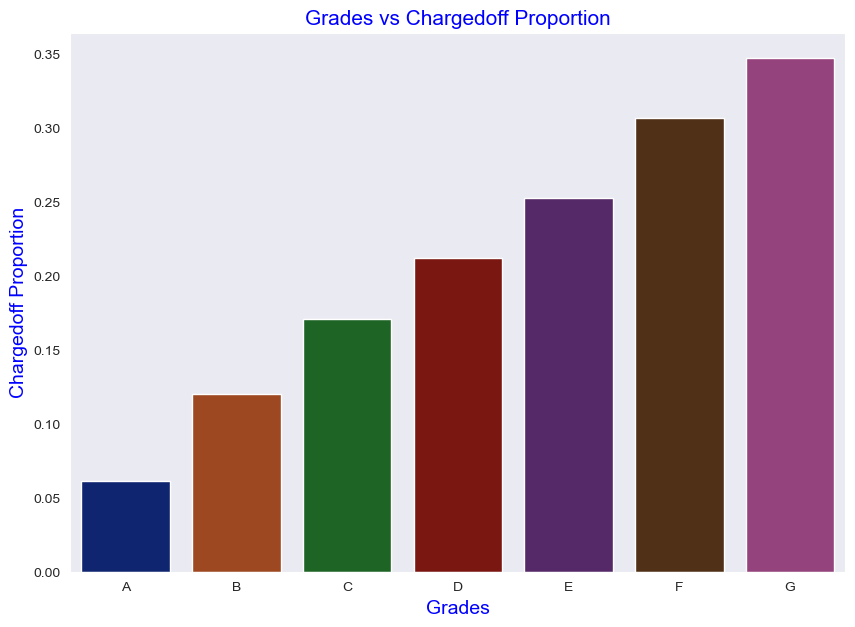

In [300]:
#   Lets plot the figure

fig, ax1 = plt.subplots(figsize=(10, 7),facecolor='w')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=gr_vs_COloan)
ax1.set_xlabel('Grades',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='b')
plt.show()


Here is the analysis :<br><br>
-Grade "A" has the least chance of charged off.<br>
-Grade "G" has the highest chance of charged off, followed by "F".<br>
-Chances of charged off is directly propotional to grade, moving ascending order.<br>

In [301]:
#   Sub Grades Vs Charged Off proportions

subgrade_vs_loan = loanData.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Current'] + subgrade_vs_loan['Fully Paid'] 
subgrade_vs_loan['Chargedoff_Proportion'] = subgrade_vs_loan['Charged Off'] / subgrade_vs_loan['Total']
subgrade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,49.0,3.0,48.0,100.0,0.490000
32,G3,19.0,3.0,22.0,44.0,0.431818
34,G5,9.0,0.0,12.0,21.0,0.428571
31,G2,26.0,1.0,40.0,67.0,0.388060
30,G1,30.0,9.0,57.0,96.0,0.312500
28,F4,46.0,14.0,90.0,150.0,0.306667
26,F2,66.0,13.0,146.0,225.0,0.293333
23,E4,115.0,25.0,269.0,409.0,0.281174
27,F3,45.0,9.0,109.0,163.0,0.276074
25,F1,79.0,18.0,195.0,292.0,0.270548


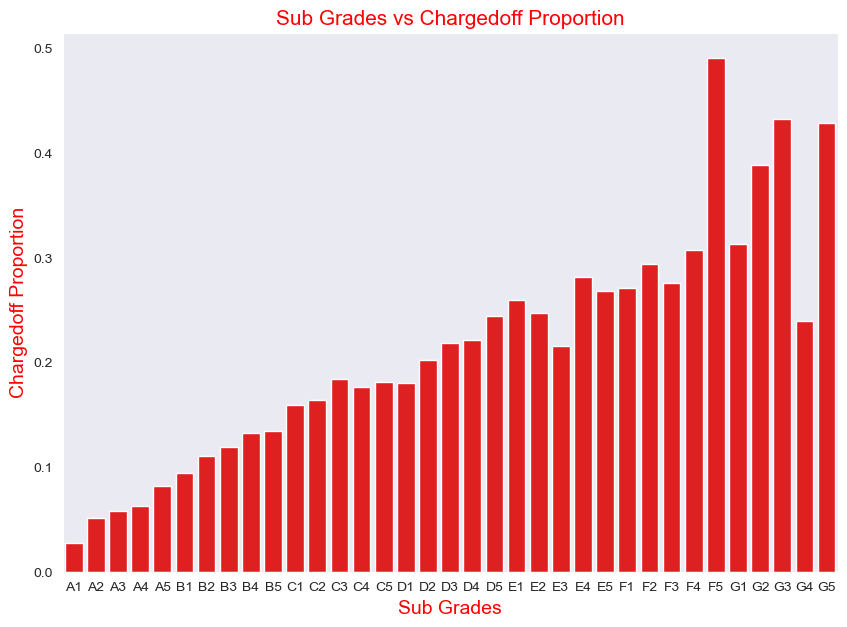

In [303]:
#   Lets plot the figure

fig, ax1 = plt.subplots(figsize=(10, 7),facecolor='w')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='r')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=subgrade_vs_loan,color='red')
ax1.set_xlabel('Sub Grades',fontsize=14,color='r')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'r')
plt.show()

Here is the analysis : <br><br>
-sub Grades of "A1" has the least chances of getting charged off. <br>
-sub Grades of between F5 has the highest chance of getting charged off.<br>
-Overall F5 to G5 has high chance of getting charged off.<br>
-proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G".<br>
